## 1. Introduction

This project explores Netflix content using a dataset that includes movies and TV shows available on the platform. The goal is to understand trends in content type, genre, ratings, user reviews, and other attributes. Through Exploratory Data Analysis (EDA), we aim to uncover patterns and insights that help us understand Netflix's content strategy.

This project showcases skills in data cleaning, visualization, and analytical storytelling — valuable in any data science or business intelligence role.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

## 2.Dataset Overview

In [124]:

df = pd.read_csv("/Users/ankitpal/Documents/PROJECTS/NETFLIX/netflix_numerical_data.csv")
df

,Show_ID,Title,Category,Genre,Release_Year,Country,Rating,Duration,Director,Cast,Industry,Language,IMDB_Rating,User_Reviews,Revenue_Million,Seasons_Count
0,s1,Andhadhun,Movie,Thriller,1998,France,PG-13,NaN,Bong Joon-ho,NaN,Bollywood,Hindi,7.6,NaN,203.11,9.0
1,s2,Better Call Saul,Movie,Thriller,2007,South Korea,TV-MA,NaN,Baran bo Odar,NaN,Hollywood,English,NaN,27123.0,296.87,7.0
2,s3,Black Mirror,TV Show,Comedy,2005,India,TV-MA,3 Seasons,Anurag Kashyap,Sonam Kapoor,Hollywood,English,9.0,34062.0,290.13,NaN
3,s4,Dangal,TV Show,Fantasy,2016,UK,TV-MA,10 Episodes,Bong Joon-ho,Millie Bobby Brown,Bollywood,Hindi,8.7,11177.0,331.65,NaN
4,s5,The Queen's Gambit,Movie,Comedy,2005,Germany,NaN,1h 30m,Vince Gilligan,Song Kang-ho,Hollywood,English,6.5,NaN,48.54,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,s146,Stranger Things,TV Show,Sci-Fi,2002,Canada,PG-13,1h 30m,NaN,Bryan Cranston,Hollywood,English,8.9,37935.0,99.38,7.0
146,s147,Money Heist,Movie,Comedy,1995,UK,TV-MA,1h 30m,Anurag Kashyap,Shah Rukh Khan,Hollywood,English,5.1,27589.0,240.11,8.0
147,s148,Riverdale,TV Show,Thriller,2018,USA,TV-14,1h 30m,Anurag Kashyap,Jennifer Aniston,Hollywood,English,8.9,31015.0,NaN,7.0
148,s149,Stranger Things,Movie,Crime,2021,Canada,TV-MA,3 Seasons,NaN,Henry Cavill,Hollywood,English,7.4,30009.0,84.00,5.0


In [126]:
df_copy=df.copy()

In [118]:
print("Shape of Dataset:", df_copy.shape)

Shape of Dataset: (150, 16)


In [39]:
df_copy.describe()

,Release_Year,IMDB_Rating,User_Reviews,Revenue_Million,Seasons_Count
count,150.000000,130.000000,125.000000,120.000000,115.000000
mean,2001.773333,7.351538,25225.384000,246.738667,5.000000
std,11.704497,1.300223,13804.821985,136.168877,2.445906
min,1980.000000,5.000000,1526.000000,5.510000,1.000000
25%,1991.000000,6.200000,12745.000000,128.265000,3.000000
50%,2003.000000,7.450000,25860.000000,250.785000,5.000000
75%,2012.000000,8.600000,36150.000000,331.275000,7.000000
max,2022.000000,9.400000,49901.000000,496.680000,9.000000


## 3. DATA Cleaning and Preprocessing

### ->Checking for duplicate values

In [194]:
df_copy.duplicated().sum()

0

### ->Checking null values

In [128]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Show_ID          150 non-null    object 
 1   Title            150 non-null    object 
 2   Category         150 non-null    object 
 3   Genre            150 non-null    object 
 4   Release_Year     150 non-null    int64  
 5   Country          135 non-null    object 
 6   Rating           114 non-null    object 
 7   Duration         117 non-null    object 
 8   Director         132 non-null    object 
 9   Cast             138 non-null    object 
 10  Industry         150 non-null    object 
 11  Language         150 non-null    object 
 12  IMDB_Rating      130 non-null    float64
 13  User_Reviews     125 non-null    float64
 14  Revenue_Million  120 non-null    float64
 15  Seasons_Count    115 non-null    float64
dtypes: float64(4), int64(1), object(11)
memory usage: 18.9+ KB


In [130]:
df_copy.isnull().sum()

Show_ID             0
Title               0
Category            0
Genre               0
Release_Year        0
Country            15
Rating             36
Duration           33
Director           18
Cast               12
Industry            0
Language            0
IMDB_Rating        20
User_Reviews       25
Revenue_Million    30
Seasons_Count      35
dtype: int64

### ->Handling missing values

In [132]:
df_copy.fillna({"Release_Year":df.Release_Year.median(),
           "IMDB_Rating":df.IMDB_Rating.median(),
           "User_Reviews":df.User_Reviews.median(),
           "Revenue_Million":df.Revenue_Million.median(),
           "Seasons_Count":df.Seasons_Count.median(),
           "Director":"unknown",
           "Cast":"not available",
           "Country":"unknown",
           "Rating":df['Rating'].mode()[0],
           "Duration":df['Duration'].mode()[0]},inplace=True)

In [134]:
df_copy

,Show_ID,Title,Category,Genre,Release_Year,Country,Rating,Duration,Director,Cast,Industry,Language,IMDB_Rating,User_Reviews,Revenue_Million,Seasons_Count
0,s1,Andhadhun,Movie,Thriller,1998,France,PG-13,1h 30m,Bong Joon-ho,not available,Bollywood,Hindi,7.60,25860.0,203.110,9.0
1,s2,Better Call Saul,Movie,Thriller,2007,South Korea,TV-MA,1h 30m,Baran bo Odar,not available,Hollywood,English,7.45,27123.0,296.870,7.0
2,s3,Black Mirror,TV Show,Comedy,2005,India,TV-MA,3 Seasons,Anurag Kashyap,Sonam Kapoor,Hollywood,English,9.00,34062.0,290.130,5.0
3,s4,Dangal,TV Show,Fantasy,2016,UK,TV-MA,10 Episodes,Bong Joon-ho,Millie Bobby Brown,Bollywood,Hindi,8.70,11177.0,331.650,5.0
4,s5,The Queen's Gambit,Movie,Comedy,2005,Germany,TV-MA,1h 30m,Vince Gilligan,Song Kang-ho,Hollywood,English,6.50,25860.0,48.540,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,s146,Stranger Things,TV Show,Sci-Fi,2002,Canada,PG-13,1h 30m,unknown,Bryan Cranston,Hollywood,English,8.90,37935.0,99.380,7.0
146,s147,Money Heist,Movie,Comedy,1995,UK,TV-MA,1h 30m,Anurag Kashyap,Shah Rukh Khan,Hollywood,English,5.10,27589.0,240.110,8.0
147,s148,Riverdale,TV Show,Thriller,2018,USA,TV-14,1h 30m,Anurag Kashyap,Jennifer Aniston,Hollywood,English,8.90,31015.0,250.785,7.0
148,s149,Stranger Things,Movie,Crime,2021,Canada,TV-MA,3 Seasons,unknown,Henry Cavill,Hollywood,English,7.40,30009.0,84.000,5.0


In [51]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Show_ID          150 non-null    object 
 1   Title            150 non-null    object 
 2   Category         150 non-null    object 
 3   Genre            150 non-null    object 
 4   Release_Year     150 non-null    int64  
 5   Country          150 non-null    object 
 6   Rating           150 non-null    object 
 7   Duration         150 non-null    object 
 8   Director         150 non-null    object 
 9   Cast             150 non-null    object 
 10  Industry         150 non-null    object 
 11  Language         150 non-null    object 
 12  IMDB_Rating      150 non-null    float64
 13  User_Reviews     150 non-null    float64
 14  Revenue_Million  150 non-null    float64
 15  Seasons_Count    150 non-null    float64
dtypes: float64(4), int64(1), object(11)
memory usage: 18.9+ KB


## 4. Explolatary Data Analysis (EDA)

### -Industry wise movie count

In [59]:
indutry_type=df_copy["Industry"].value_counts()
indutry_type

Industry
Hollywood    81
Bollywood    50
Korean       19
Name: count, dtype: int64

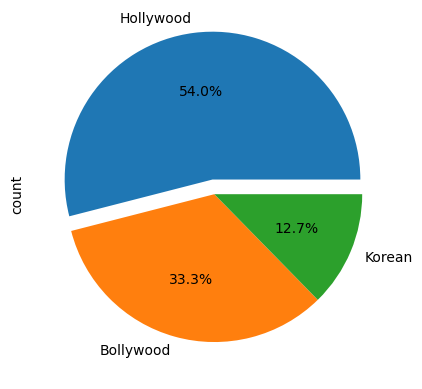

In [57]:
explode = (0.1,0,0)
df_copy["Industry"].value_counts().plot(kind="pie",explode=explode,autopct='%1.1f%%')
plt.show()

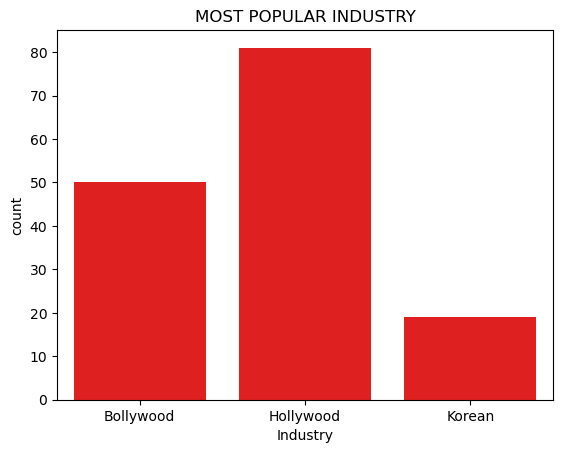

In [71]:
sns.countplot(x=df_copy["Industry"],color='r')
plt.title("MOST POPULAR INDUSTRY")
plt.show()

### -Most popular genra

In [63]:
indutry_type=df_copy["Genre"].value_counts()
indutry_type

Genre
Comedy      27
Fantasy     22
Mystery     22
Sci-Fi      21
Drama       20
Thriller    19
Crime       19
Name: count, dtype: int64

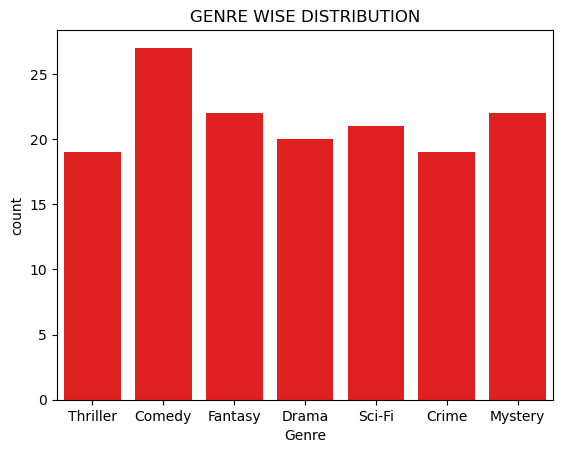

In [75]:
sns.countplot(x=df_copy["Genre"],color='r')
plt.title("GENRE WISE DISTRIBUTION")
plt.show()

### -Country wise movie distribution

In [67]:
indutry_type=df_copy["Country"].value_counts()
indutry_type

Country
Canada         25
UK             24
India          19
USA            18
France         17
South Korea    17
Germany        15
unknown        15
Name: count, dtype: int64

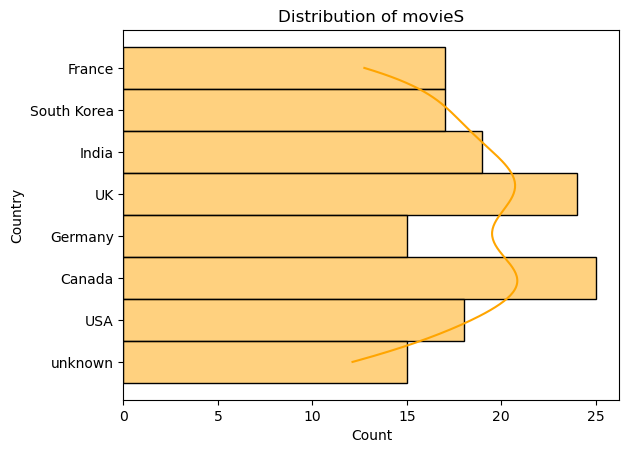

In [77]:
sns.histplot(y=df_copy['Country'],bins=100,color='orange',kde=True)
plt.title('Distribution of movieS')
plt.show()

### -Trend of movies with time

In [85]:
indutry_type=df_copy["Release_Year"].value_counts()
indutry_type

Release_Year
1991    10
2005     8
1995     7
2015     7
2016     6
2002     6
1984     6
2014     6
1998     5
1989     5
2008     5
2018     5
2004     5
2011     5
1980     5
2003     4
2012     4
2007     4
1992     3
2010     3
2020     3
2000     3
2009     3
1988     3
2001     3
2013     3
2019     2
1986     2
1996     2
1993     2
2022     2
1999     2
1981     2
1983     2
1982     2
2006     1
1987     1
1990     1
1997     1
2021     1
Name: count, dtype: int64

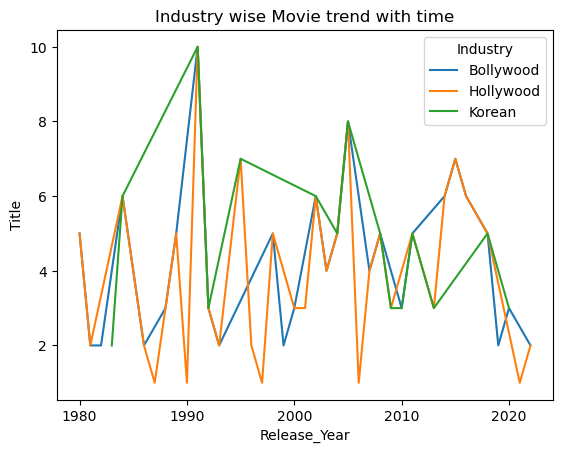

In [89]:
sns.lineplot(data=df_copy, x="Release_Year", y=df_copy.groupby("Release_Year")["Title"].transform("count"), hue="Industry")
plt.title("Industry wise Movie trend with time")
plt.show()

### -Rating distribution

In [91]:
indutry_type=df_copy["Rating"].value_counts()
indutry_type

Rating
TV-MA    70
TV-14    33
PG-13    30
R        17
Name: count, dtype: int64

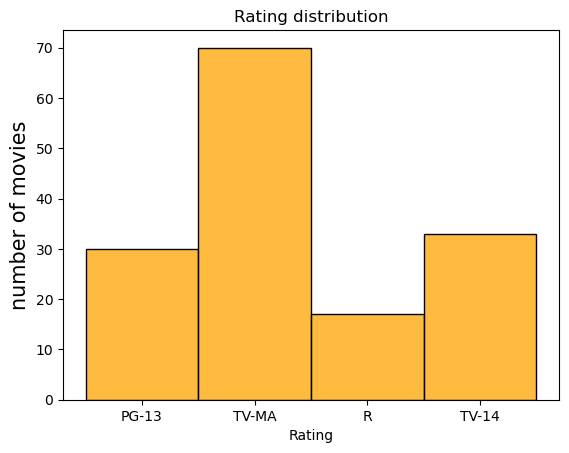

In [93]:
sns.histplot(x=df_copy['Rating'],bins=20,color='orange')
plt.title('Rating distribution')
plt.ylabel("number of movies",fontsize=15)
plt.show()

### -IMDB_Rating distributin

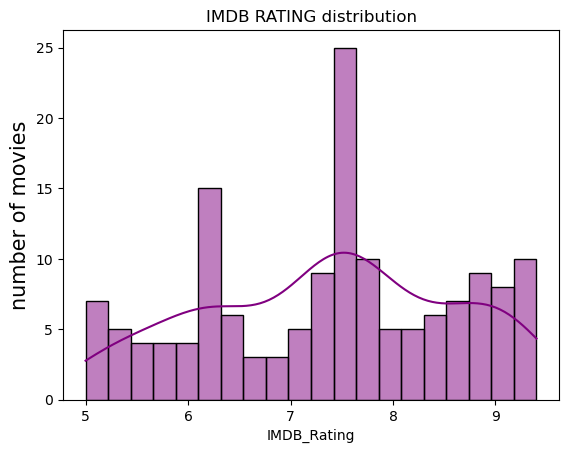

In [95]:
sns.histplot(x=df_copy['IMDB_Rating'],bins=20,color='purple',kde=True)
plt.title('IMDB RATING distribution')
plt.ylabel("number of movies",fontsize=15)
plt.show()	

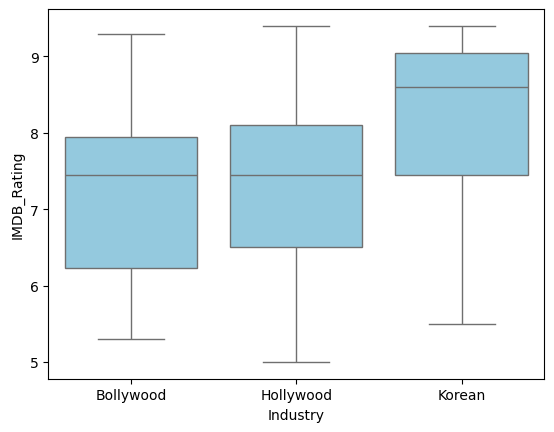

In [97]:
sns.boxplot(y=df_copy["IMDB_Rating"],x=df_copy["Industry"], color="skyblue")
plt.show()

### -Revenue_Million distribution

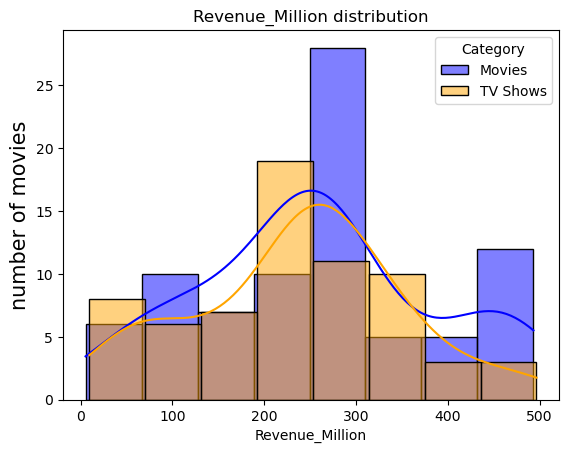

In [162]:
sns.histplot(x=df_copy[df_copy['Category']=="Movie"]['Revenue_Million'],kde=True,color="blue",label="Movies")
sns.histplot(x=df_copy[df_copy['Category']=="TV Show"]['Revenue_Million'],kde=True,color="orange",label="TV Shows")
plt.title('Revenue_Million distribution')
plt.ylabel("number of movies",fontsize=15)
plt.legend(title="Category") 
plt.show()


### -Top director



In [101]:
indutry_type=df_copy["Director"].value_counts()
indutry_type

Director
Baran bo Odar      22
Anurag Kashyap     22
Rajkumar Hirani    22
Bong Joon-ho       20
unknown            18
Beau Willimon      17
Vince Gilligan     16
Alex Pina          13
Name: count, dtype: int64

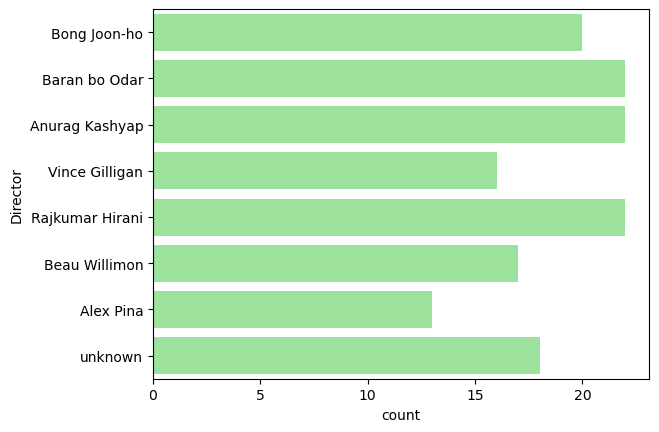

In [103]:
sns.countplot(y=df_copy["Director"],color="lightgreen")
plt.show()

### -Language wise distribution

In [105]:
indutry_type=df_copy["Language"].value_counts()
indutry_type

Language
English    81
Hindi      50
Korean     19
Name: count, dtype: int64

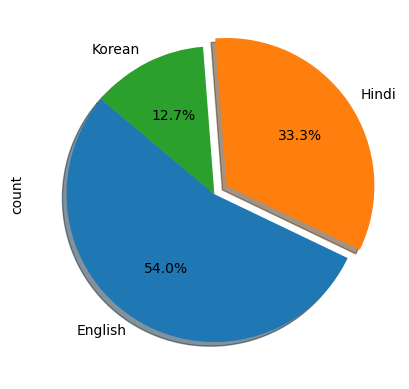

In [107]:
explode = (0,0.1,0)
df_copy["Language"].value_counts().plot(kind="pie",autopct='%1.1f%%',explode=explode,startangle=140,shadow=True)
plt.show()

### -Higher IMDB rating gets more User reviews

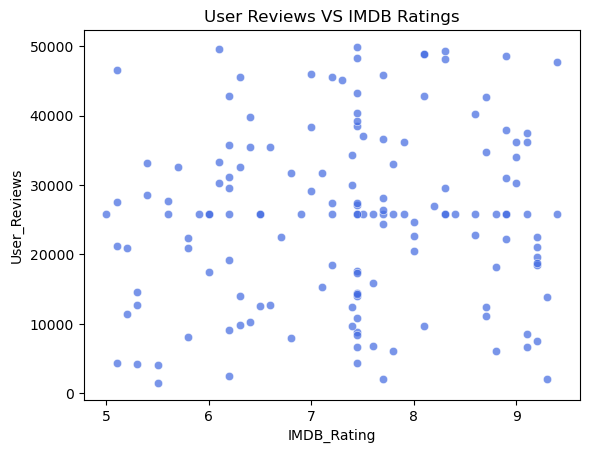

In [109]:
sns.scatterplot(y=df_copy['User_Reviews'],x=df_copy['IMDB_Rating'],alpha=0.7,color='royalblue')
plt.title("User Reviews VS IMDB Ratings")
plt.show()

### -revenue produced and imdb rating

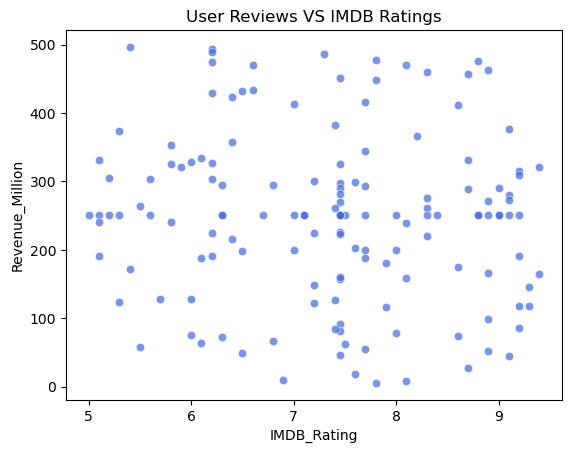

In [111]:
sns.scatterplot(y=df_copy['Revenue_Million'],x=df_copy['IMDB_Rating'],alpha=0.7,color='royalblue')
plt.title("User Reviews VS IMDB Ratings")
plt.show()

### -TV Shows/MOVIES and their IMDB rating

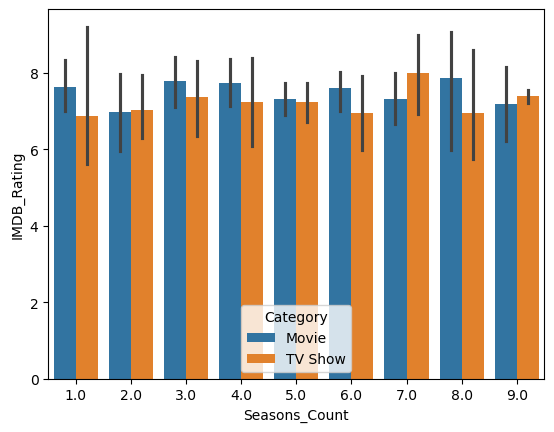

In [115]:
sns.barplot(x=df_copy['Seasons_Count'],y=df_copy['IMDB_Rating'],hue=df_copy['Category'])
plt.show()

### -Corelation Heatmap

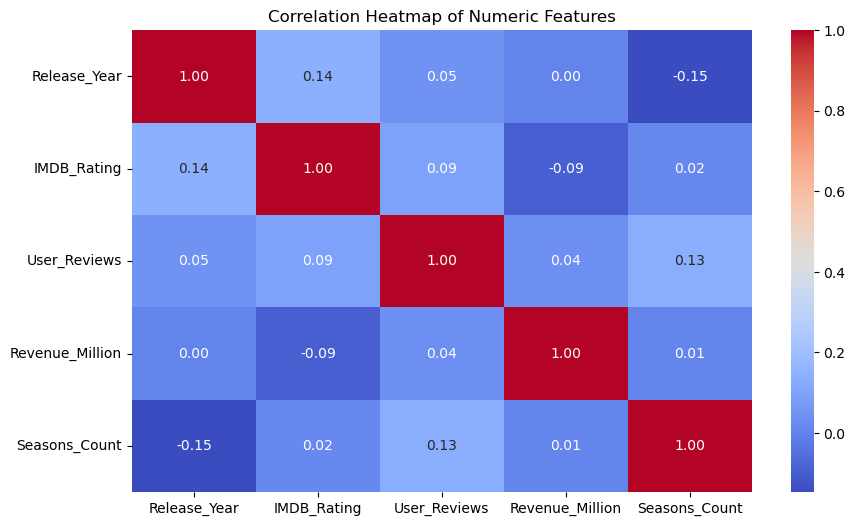

In [191]:
numeric_df = df_copy.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

## 5. Insights & Key Findings

- Netflix genrates more revenue from movies than TV shows.
- Comedy, Fantasy and Mystery are the most common genres.
- The majority of content is from the Canada, followed by UK and the India.
- IMDB Ratings mostly range from 6.2 to 7.8.
- User reviews have a positive correlation with revenue.
- Baran bo Odar, Rajkumar Hirani and Anurag Kashyap are the top directors on Netflix.
- English is the most commonly used language in Netflix movies.
- Movies having higher IMDB ratings have higher number of Reviews.
- Revenue_Million have a strong positive correlation with User_Reviews, meaning more popular content earns more revenue.
- IMDB_Rating and User_Reviews are positively correlated, it means higher-rated shows get more user engagement.


## 6. Conclusion

The Netflix dataset reveals interesting insights about content diversity, user engagement, and platform trends. The project demonstrates a basic data science workflow including  visualization and insight generation.

It highlights the importance of visual storytelling in communicating findings to stakeholders.